# Benchmark FUSE against GASC

In [1]:
using Revise
using FUSE
using Plots; gr();
FUSE.logging(Logging.Info);

## Initialize with GASC v1 JSON file (FPPv1.0_aspectRatio3.5_PBpR35.json)

In [2]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);

### Modify select parameters to better match GASC solution

In [3]:
ini.equilibrium.R0 = 4.824
ini.equilibrium.ϵ = 1/3.5
ini.equilibrium.κ = 2.19
ini.equilibrium.δ = 0.7
ini.equilibrium.ζ = 0.0

ini.equilibrium.ip = 9.0e6
#ini.material.wall = "Tungsten"
#ini.material.shield = "Steel, Stainless 316"
ini.core_profiles.T_shaping = 2.0
ini.core_profiles.n_shaping = 2.0
ini.core_profiles.greenwald_fraction = 0.95
ini.core_profiles.greenwald_fraction_ped = missing
ini.core_profiles.ne_ped = 1.18e20
ini.core_profiles.impurity = :Kr
ini.core_profiles.zeff = 1.1
ini.pf_active.n_coils_outside = 8


ini.equilibrium.boundary_from = :scalars
ini.equilibrium.xpoints_number = 2

#ini.build.n_first_wall_conformal_layers = 3

#display(ini)

3

### Modify select actor settings to better match GASC solution

In [4]:
act.ActorEquilibrium.model = :CHEASE
act.ActorEquilibrium.symmetrize = true
act.ActorCHEASE.free_boundary = true
act.ActorCXbuild.rebuild_wall = true

act.ActorTauenn.T_shaping = 2.0
act.ActorTauenn.confinement_factor = 0.9

act.ActorCosting.model = :Sheffield

#display(act)

:Sheffield

### Run FUSE.init

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 15.8 [keV]               ne0 → 1.55e+20 [m⁻³]           
a → 1.38 [m]                   ip → 9.01 [MA]                 Ti0 → 15.8 [keV]               ne_ped → 1.18e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 3.76                     <Te> → 6.9 [keV]               <ne> → 1.33e+20 [m⁻³]          
κ → 2.19                       βpol → 1.33                    <Ti> → 6.9 [keV]               ne0/<ne> → 1.16                
δ → 0.697                      βtor → 0.0365                  Te0/<Te> → 2.29                fGW → 0.941                    
ζ → -0.00796                   βn → 2.63                      Ti0/<Ti> → 2.29                zeff_ped → 1.1                 


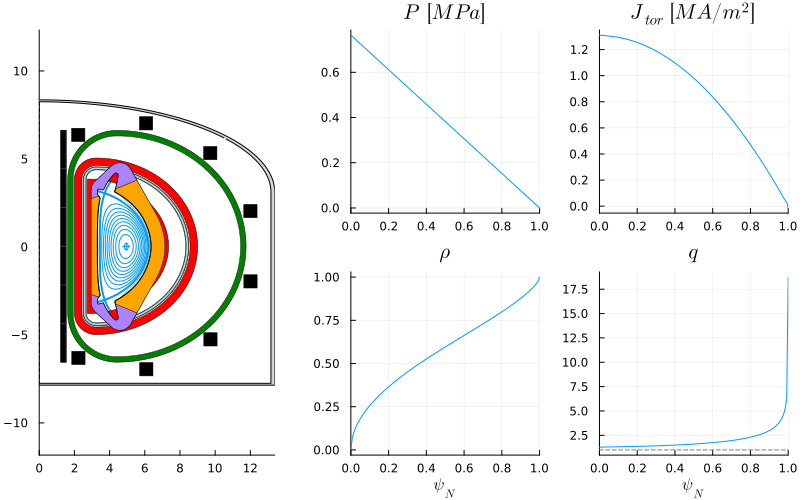

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19804     0.0       1.19804                15.7757      59.3759
   2 │ in                            oh        0.353714    1.19804   1.55176  ReBCO          4.65767     40.2364
   3 │ in                                      0.0696397   1.55176   1.6214                  0.917009     9.14143
   4 │ hfs                           tf        0.310622    1.6214    1.93202  ReBCO         11.5775     117.947
   5 │ hfs                                     0.0696397   1.93202   2.00166                40.6661    1985.67
   6 │ hfs     low temp              shield    0.428631    2.00166   2.43029 

​


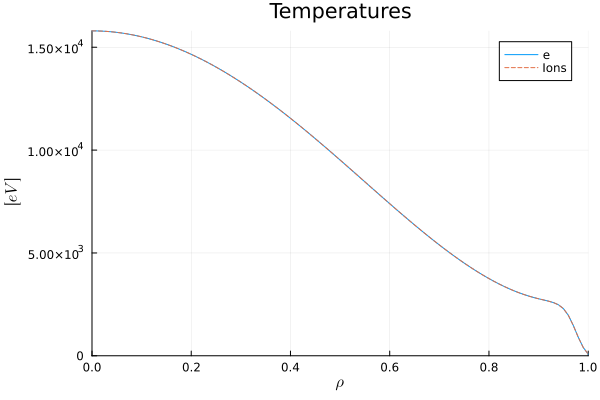

​


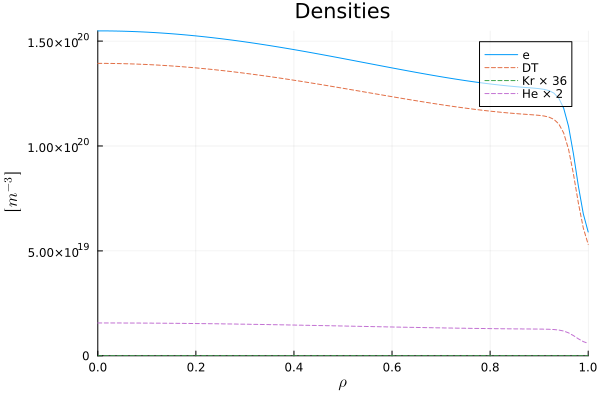

​


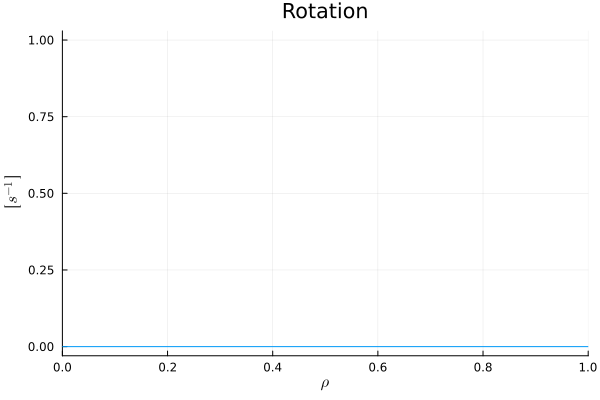

​


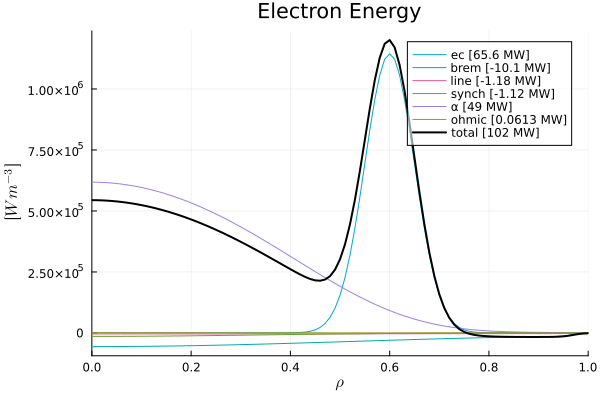

​


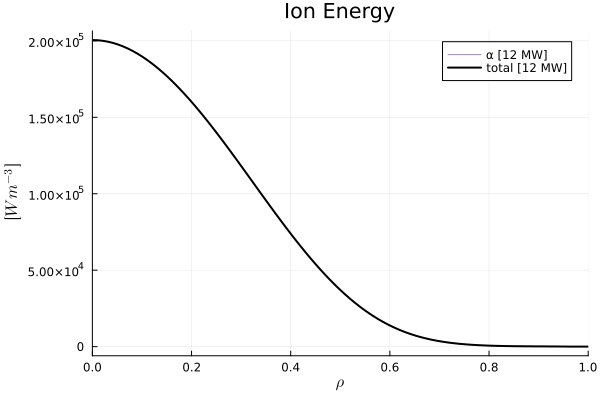

​


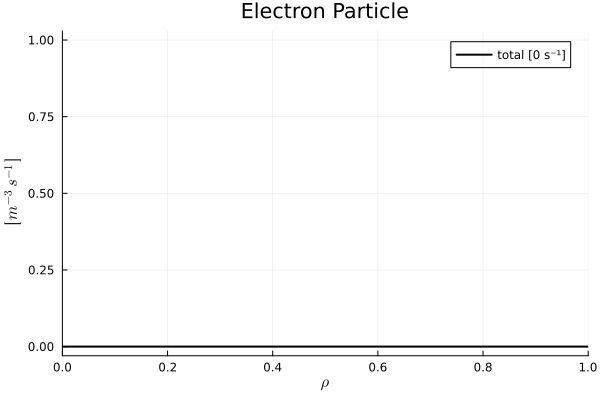

​


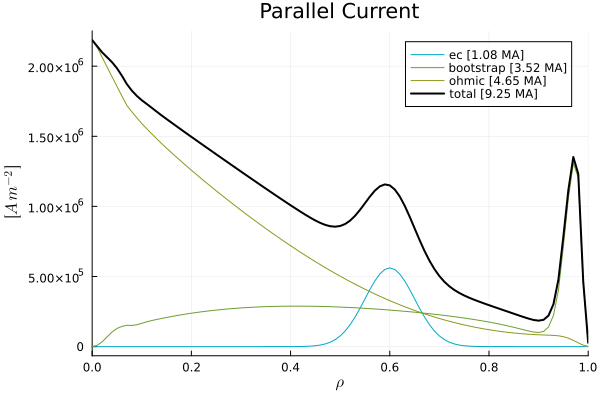

In [5]:
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd)

In [6]:
tf_to_plasma = IMAS.get_build(dd.build, fs=IMAS._hfs_, return_only_one=false, return_index=true)
display(tf_to_plasma)
display(IMAS._offset_)
display(IMAS._negative_offset_)
display(dd.build.layer[14])


11-element Vector{Int64}:
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14

_offset_::BuildLayerShape = 0

_negative_offset_::BuildLayerShape = 1

14
├─ area ➡ Function [m^2]
├─ end_radius ➡ Function [m]
├─ fs ➡ 1
├─ identifier ➡ 8020416500513164811
├─ material ➡ "Tungsten"
├─ name ➡ "hfs first wall"
├─ outline
│  ├─ r ➡ 418-element Vector{Float64} [m]
│  └─ z ➡ 418-element Vector{Float64} [m]
├─ shape ➡ 0
├─ shape_parameters ➡ Function
├─ start_radius ➡ Function [m]
├─ thickness ➡ 0.0202094 [m]
├─ type ➡ 5
└─ volume ➡ Function [m^3]


## Model entire facility

In [7]:
#@time FUSE.ActorWholeFacility(dd, act);
#FUSE.digest(dd)